In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [3]:
suumo = pd.read_csv('SuumoTokyoShaped20221012.csv')
suumo

,カテゴリ,建物名,都道府県,市区町村,市区町村以下,路線,駅,歩,バス,車,...,地下,階数,階,賃料,管理費,敷金,礼金,間取り,専有面積,url
0,賃貸アパート,プチ・ボヌール,東京都,大田区,南蒲田３,京急空港線,糀谷駅,7,0,0,...,0,2,2.0,14.8,5000,14.8,14.8,42DK,48.87,https://suumo.jp/chintai/jnc_000046696863/?bc=...
1,賃貸一戸建て,荒川戸建,東京都,荒川区,荒川２,東京メトロ千代田線,町屋駅,5,0,0,...,0,3,3.0,19.5,0,39.0,19.5,3SLDK,97.95,https://suumo.jp/chintai/jnc_000076009318/?bc=...
2,賃貸一戸建て,荒川戸建,東京都,荒川区,荒川２,東京メトロ千代田線,町屋駅,5,0,0,...,0,3,3.0,19.5,0,39.0,19.5,3SLDK,97.95,https://suumo.jp/chintai/jnc_000076047600/?bc=...
3,賃貸マンション,ティモーネ上野の森ノース,東京都,荒川区,東日暮里４,ＪＲ山手線,鶯谷駅,6,0,0,...,0,11,2.0,15.2,10000,15.2,15.2,2LDK,52.04,https://suumo.jp/chintai/jnc_000077318759/?bc=...
4,賃貸アパート,東京メトロ日比谷線 三ノ輪駅 3階建 築13年,東京都,荒川区,南千住５,東京メトロ日比谷線,三ノ輪駅,5,0,0,...,0,3,3.0,11.3,2000,11.3,11.3,1LDK,43.81,https://suumo.jp/chintai/jnc_000077330023/?bc=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156938,賃貸マンション,メゾンスギモト,東京都,江戸川区,東小岩１,ＪＲ総武線,小岩駅,20,0,0,...,0,3,3.0,8.5,0,8.5,8.5,2DK,40.00,https://suumo.jp/chintai/jnc_000069889741/?bc=...
156939,賃貸マンション,大場ビル,東京都,江戸川区,西一之江２,都営新宿線,一之江駅,26,0,0,...,0,3,2.0,8.6,4000,0.0,0.0,2LDK,47.25,https://suumo.jp/chintai/jnc_000019146531/?bc=...
156940,賃貸一戸建て,中澤貸家,東京都,江戸川区,江戸川２,都営新宿線,瑞江駅,14,0,0,...,0,2,2.0,8.4,0,16.8,0.0,3K,52.87,https://suumo.jp/chintai/jnc_000070035188/?bc=...
156941,賃貸マンション,東京メトロ副都心線 雑司が谷駅 7階建 築37年,東京都,豊島区,高田１,東京メトロ副都心線,雑司が谷駅,4,0,0,...,0,7,7.0,9.2,8000,9.2,9.2,1DK,26.04,https://suumo.jp/chintai/jnc_000074167859/?bc=...


In [4]:
feature_name = [
    'カテゴリ',
    '建物名',
    '都道府県',
    '市区町村',
    '市区町村以下',
    '路線',
    '駅',
    '歩',
    'バス',
    '車',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '賃料',
    '管理費',
    '敷金',
    '礼金',
    '間取り',
    '専有面積',
    'url',
]

# 可視化

## 相関

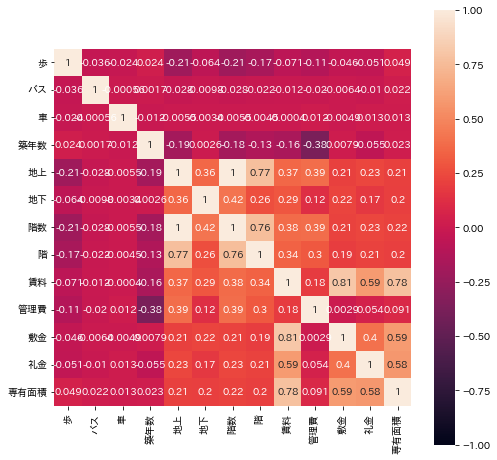

In [54]:
# 相関が高いのは
#（階：地上：地下：階数）
# (賃料：敷金：礼金：専有面積)
# (管理費：築年数)不
plt.figure(figsize=(8,8))
sns.heatmap(suumo.corr(),annot=True, vmax=1,vmin=-1, square=True)
plt.show()

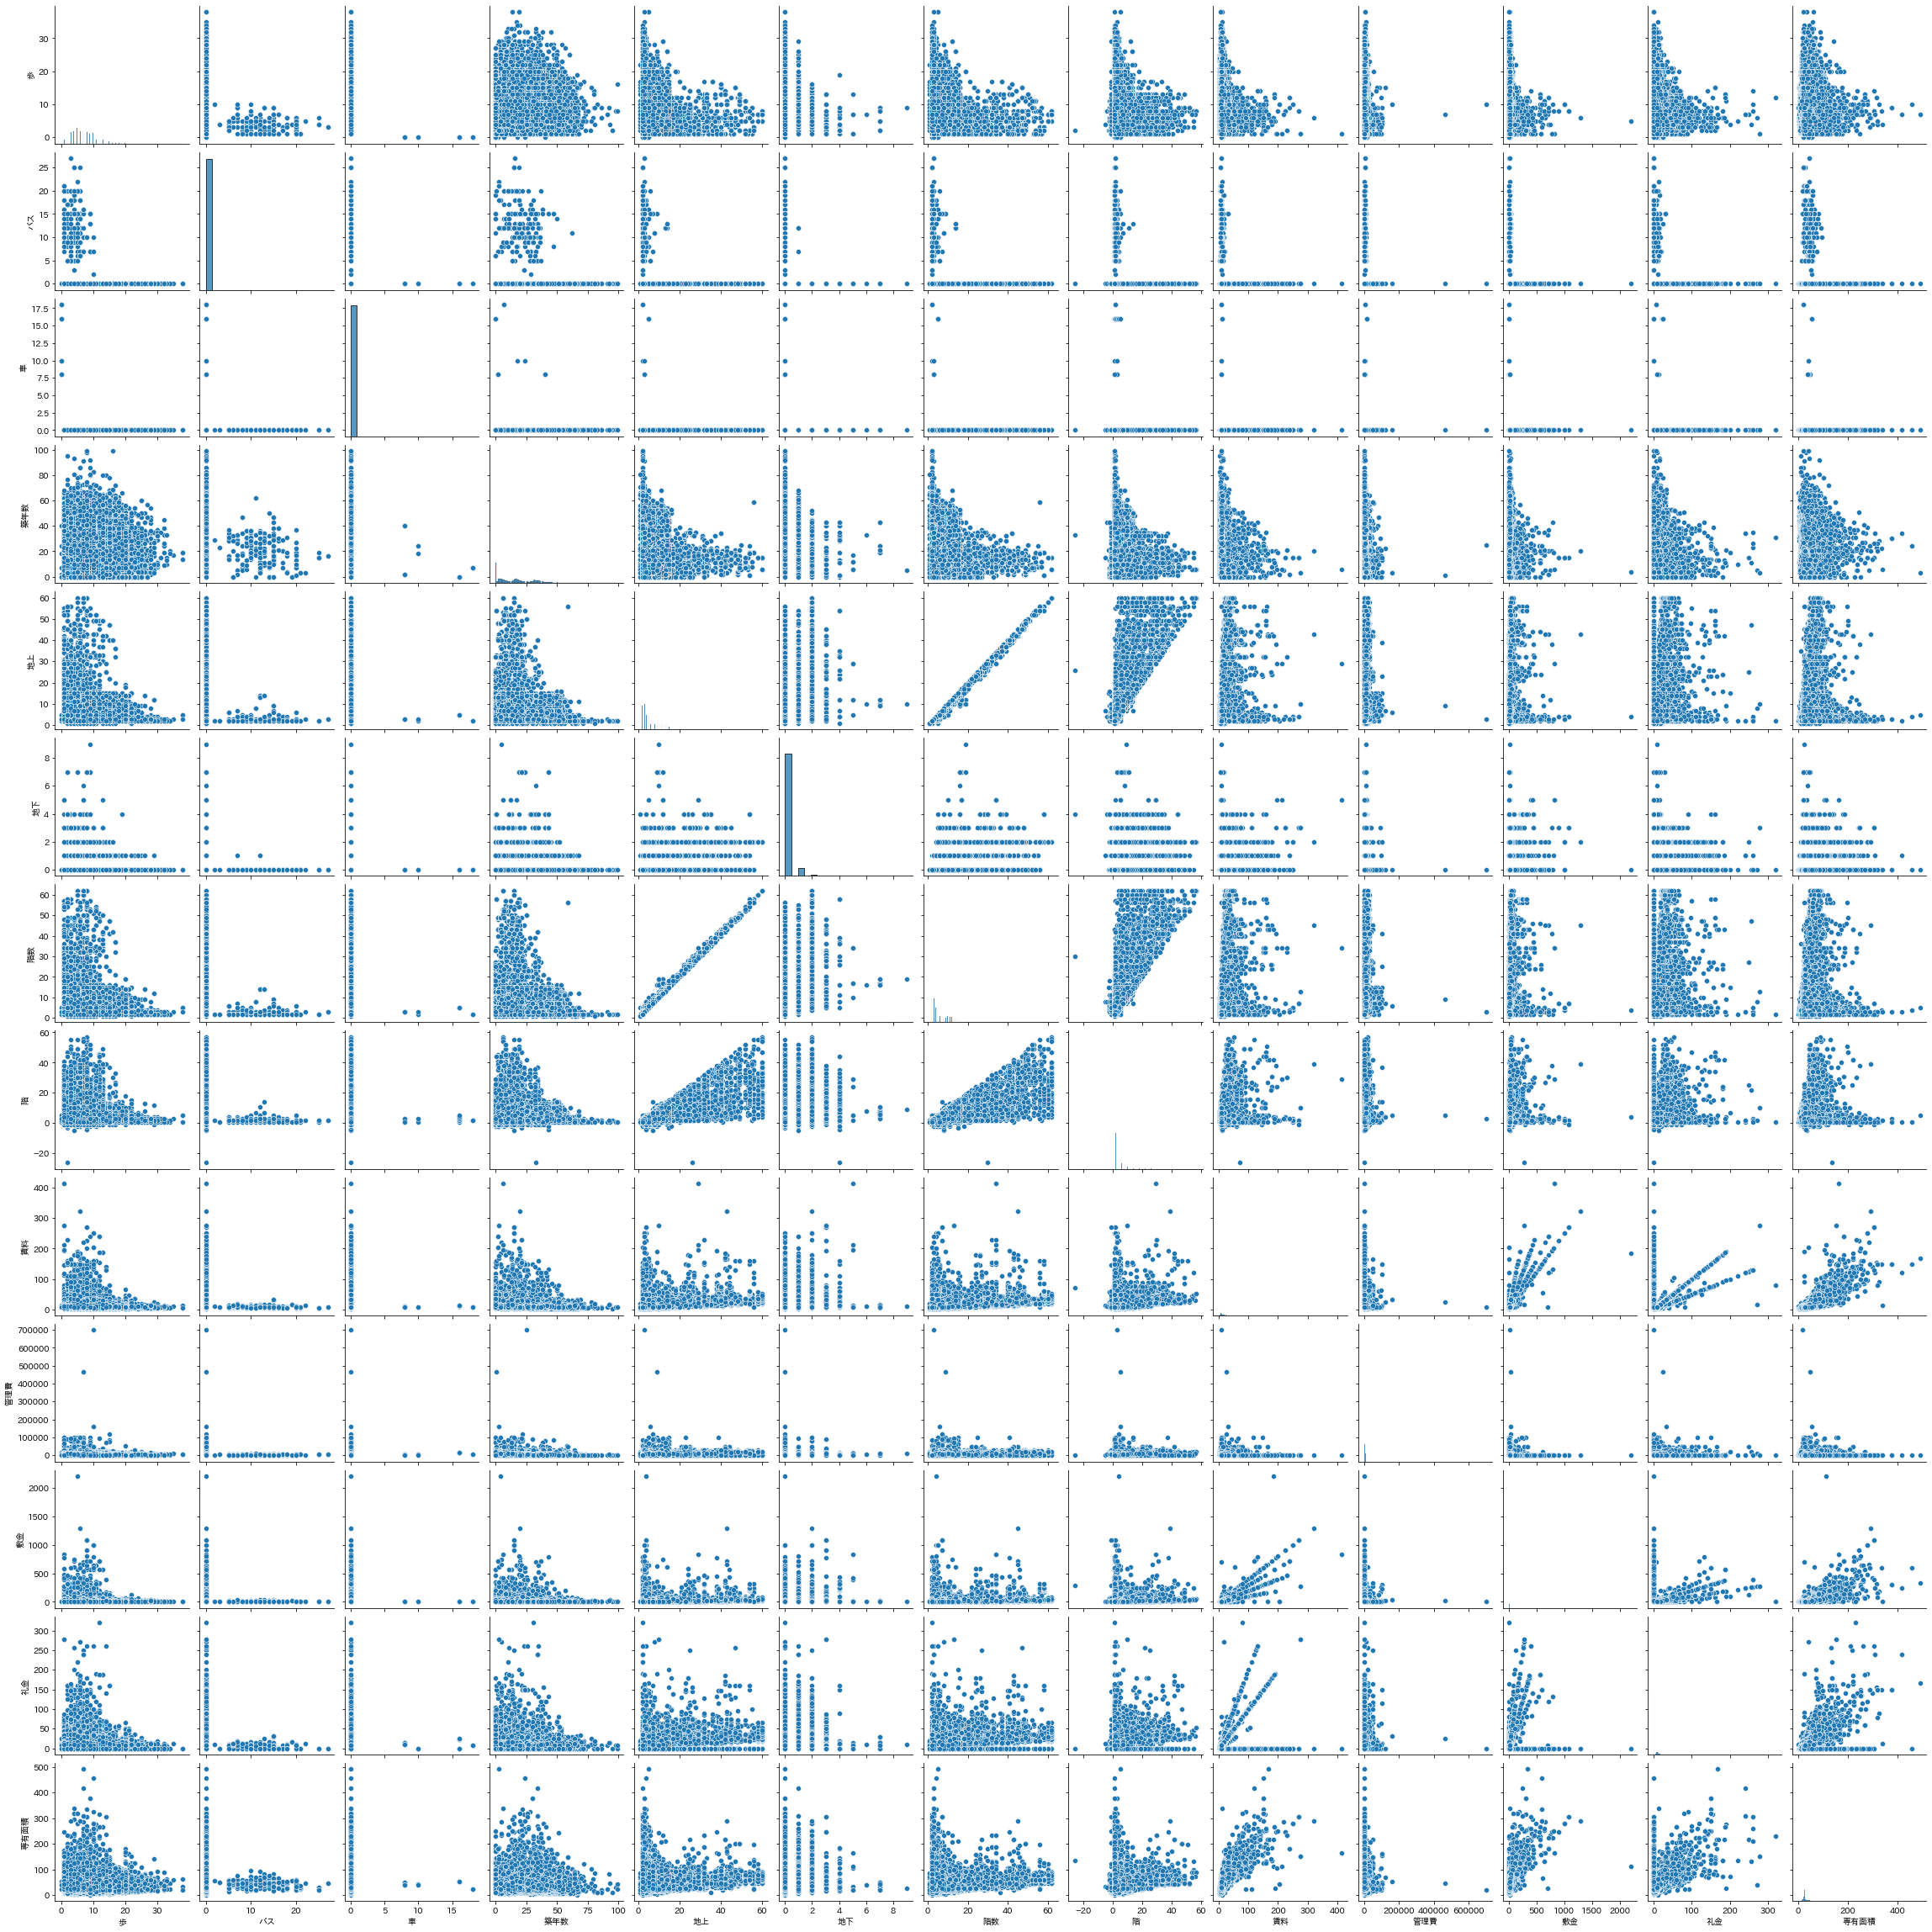

In [58]:
sns.pairplot(data=suumo)

## カテゴリ

In [29]:
# カテゴリは6種類
print(suumo['カテゴリ'].unique())

['賃貸アパート' '賃貸一戸建て' '賃貸マンション' '賃貸テラス・タウンハウス' '賃貸その他']


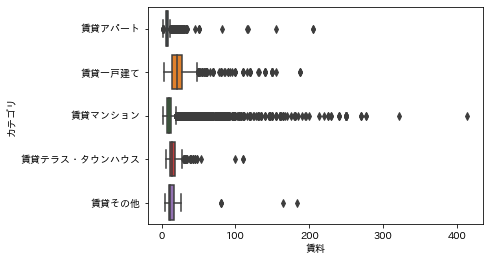

In [39]:
# カテゴリと賃料の関係
# スケールがでかすぎる
sns.boxplot(data=suumo, x='賃料', y='カテゴリ')
plt.show()

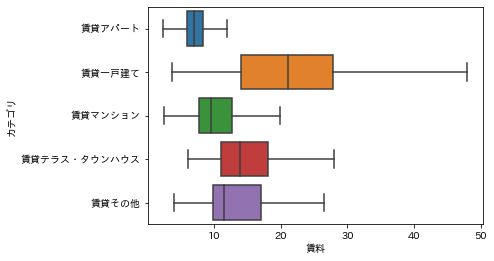

In [41]:
# 外れ値を外す
# 賃貸1戸建ては結構幅がある
# マンションは安めの層がメインだが小数のぶっ壊れが存在する
sns.boxplot(data=suumo, x='賃料', y='カテゴリ', sym='')
plt.show()

## 市区町村

In [5]:
# 東京23区のみ集計対象
print(suumo['市区町村'].unique())
print(suumo['市区町村'].unique().shape)

['大田区' '荒川区' '足立区' '葛飾区' '台東区' '目黒区' '江戸川区' '中野区' '板橋区' '豊島区' '墨田区' '千代田区'
 '中央区' '文京区' '江東区' '北区' '杉並区' '品川区' '練馬区' '渋谷区' '世田谷区' '新宿区' '港区']
(23,)


In [5]:
# 順番調整
def order_mean(group, by, index, asc):
    sort_describe = suumo.groupby(group).describe()[by].sort_values(index,ascending=asc)
    order = sort_describe.index
    return order

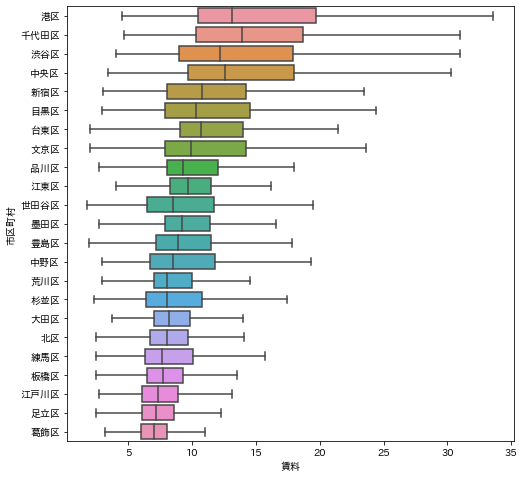

In [6]:
# 市区町村による賃料の違い
# 見づらいので外れ値は除去
# 幅が広くお高めな物件が結構ある：[千代田区、中央区、渋谷区、港区]
# 幅狭めで安め[葛飾区、足立区、板橋区、北区、練馬区、江戸川区]
order = order_mean('市区町村', '賃料','mean', False)
plt.figure(figsize=(8,8))
sns.boxplot(data=suumo, x='賃料', y='市区町村', order=order, sym='')
plt.show()

## 路線

In [7]:
# 路線は64種類
print(suumo['路線'].unique().shape)
print(suumo['路線'].unique())

(64,)
['京急空港線' '東京メトロ千代田線' 'ＪＲ山手線' '東京メトロ日比谷線' '日暮里・舎人ライナー' 'ＪＲ常磐線' 'つくばエクスプレス'
 'ＪＲ高崎線' '都電荒川線' '東武大師線' '京成押上線' '東武伊勢崎線' '東急目黒線' '京成本線' 'ＪＲ総武線' '西武新宿線'
 '東武東上線' '都営新宿線' '東京メトロ東西線' '東急大井町線' '東急東横線' '都営三田線' '東京メトロ有楽町線' '西武池袋線'
 '都営大江戸線' 'ＪＲ中央線' '東京メトロ半蔵門線' 'ＪＲ京浜東北線' '東京メトロ丸ノ内線' '東京メトロ銀座線' 'ＪＲ埼京線'
 '都営浅草線' '東京メトロ南北線' '東京メトロ副都心線' '東急田園都市線' '京急本線' '京王線' 'ＪＲ総武線快速' '京王井の頭線'
 '新交通ゆりかもめ' '小田急線' 'ＪＲ京葉線' '東急池上線' '京王新線' 'ＪＲ横須賀線' '湘南新宿ライン宇須' 'りんかい線'
 'ＪＲ宇都宮線' '東急世田谷線' '京成金町線' '西武有楽町線' '東急多摩川線' '東武亀戸線' '北総線' '成田スカイアクセス'
 '東京モノレール' '埼玉高速鉄道' '西武豊島線' '東海道新幹線' 'ＪＲ東海道本線' '東北新幹線' '西武バス' '見沼代親水公園駅'
 '西武池袋線\u3000大泉学園駅']


3         ＪＲ山手線
8         ＪＲ常磐線
9         ＪＲ常磐線
10        ＪＲ常磐線
11        ＪＲ常磐線
          ...  
156928    ＪＲ中央線
156929    ＪＲ中央線
156936    ＪＲ総武線
156937    ＪＲ総武線
156938    ＪＲ総武線
Name: 路線, Length: 36952, dtype: object

In [180]:
order = suumo[suumo['路線'].str.contains('ＪＲ')].groupby('路線').describe()['賃料'].sort_values('mean',ascending=False).index

In [1]:
# 路線ごとの賃料
# 結構差があるような印象
order = order_mean('路線', '賃料','mean', False)
plt.figure(figsize=(8,6))
sns.boxplot(data=suumo, x='賃料', y='路線', order=order, sym='')
plt.show()

NameError: name 'order_mean' is not defined

## 駅

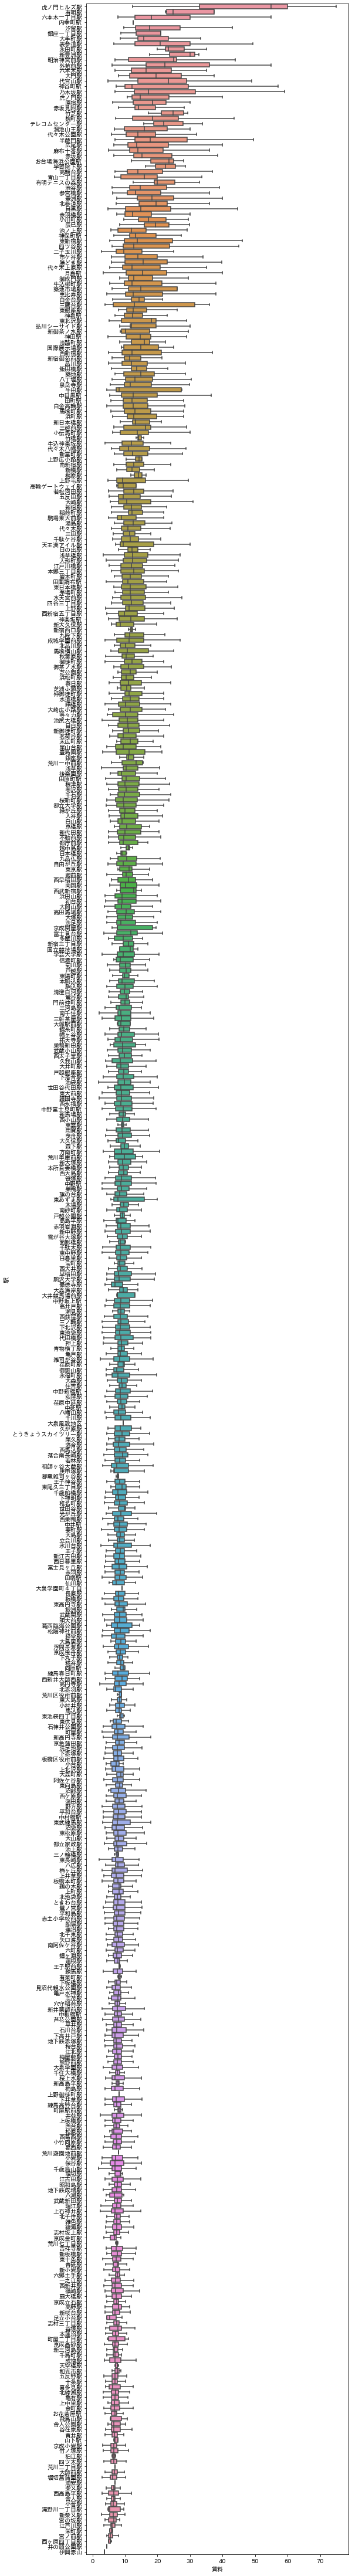

In [60]:
# 駅と賃料
order = order_mean('駅', '賃料','mean', False)
plt.figure(figsize=(8,80))
sns.boxplot(data=suumo, x='賃料', y='駅',order=order, sym='')
plt.show()

## 歩

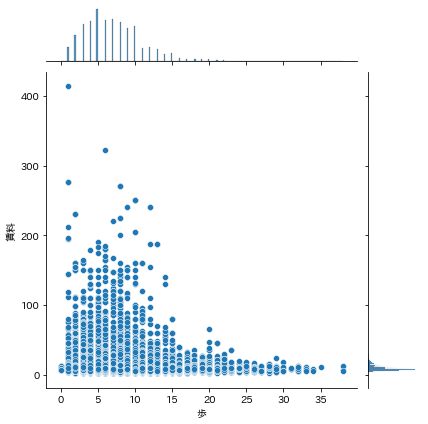

In [77]:
sns.jointplot(data=suumo, x='歩', y='賃料')
plt.show()

In [74]:
sns.relplot?

## バス

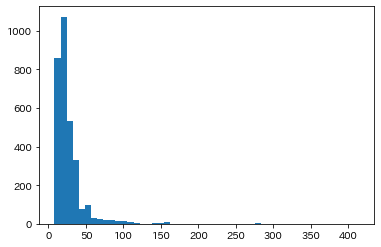

In [128]:
plt.hist(suumo[suumo['間取り'] == '3LDK']['賃料'],bins=50)
plt.show()

## 車

## 築年数

## 地上

## 地下

## 階数

## 階

## 賃料

## 管理費

## 敷金

## 礼金

## 専有面積